<h1 style="color: #001a79;">Machine Learning Project Notebook</h1>

<h3 style="color: #001a79;">For this notebook you will need the following packages:</h3>

In [2]:
# Efficient numerical arrays.
import numpy as np

# Dataframes for data manipulation and analysis.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Plotting dates.
import matplotlib.dates as mdates

<h3 style="color: #001a79;">Introduction</h3>

<hr style="border-top: 1px solid #001a79;" />

Detecting anomalies in datasets has broad applications in a lot of domains. These include areas such as fraud detection in credit cards, fault detection and safety critical systems, and network intrusion detection for cyber secuirity. Due to it's wide range of appications the problem of anomaly detection has been thoroughly reseached amongst industry specialists and academics. Several algorithms have been introduced for determining anomalies in problem settings. However, there were no datasets or framework that was openly availible which the proposed algorithms could be evaluated on a common ground. This changed with the introduction of the Numenta Anomaly Benchmark (NAB) Framework in 2015.  

The Numenta Anomaly Benchmark (NAB) Framework is an open source framework with extensive documentation, and a scoreboard of anomaly detection algorithms found <a href="https://github.com/numenta/NAB" target="_blank">here</a>. used to evaluate and compare various anomaly detection algorithms. It contains labeled data files and a common scoring system to compare and evaluate different anomaly detection algorithms for detecting anomalies in streaming data. In streaming data, anomalies (which can also be refered to as outliers) are patterns that do not match with previous patterns of behaviour for the given data stream. 

The Numenta Anomaly Benchmark (NAB) has two major components. The labelled data sets which comprise of over 50 labeled real-world and artificial timeseries data files and the scoring system designed for real-time applications. Each has been designed to create a evaluation framework for various anomaly detection algotrithms. 

https://www.youtube.com/watch?v=QPQA9X5-V0g&ab_channel=fintelics

Comeback to

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

<h3 style="color: #001a79;">Loading the Data</h3>

<hr style="border-top: 1px solid #001a79;" />

To demonstrate anomaly detection effectively we will use two datasets from the Numenta Anomaly Benchmark (NAB) artificially generated dataset. 

1. <a href="https://github.com/numenta/NAB/blob/master/data/artificialNoAnomaly/art_daily_small_noise.csv" target="_blank">`art_daily_small_noise.csv`</a> - we will use this to **train the model. It has no anomalies**. 
2. <a href="https://github.com/numenta/NAB/blob/master/data/artificialWithAnomaly/art_daily_jumpsup.csv" target="_blank">`the art_daily_jumpsup.csv`</a> - we will use this to **test the model. It has anomalies**. 

In [3]:
# These CSVs can be found at the follow URL.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'
root_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/'

### `df_train`

In [4]:
# art_daily_small_noise.csv data file url.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [5]:
# Import and save data as a df - df_small_noise. 
# parse_dates=True will tell pandas you are importing a date while index_col="timestamp" sets timestamp as the index. 
df_train = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

# Print 
df_train

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


`df_train` contains 4,032 rows of data with 2 columns `timestamp` (the index) and `value`. 

`timestamp` - Is the dataframes index and represents a **date and time** formatted as Year-Month-Day (YYYY-MM-DD) and Hours:Minutes:Seconds (hh:mm:ss). 

The timestamp starts at the 1st of April 2014 at 12:00am and increments by 5 minutes at each row. The last data point on 14th of April 2014 at 12:55pm. 

Therefore for 14 days, every 5 minutes a value is recorded. 
- Every hour 12 values are recorded. 
- Every day 288 values are recorded. 
- So in 14 days 4,032 values are recorded in total.

`value` - is a value recorded at each timestamp.

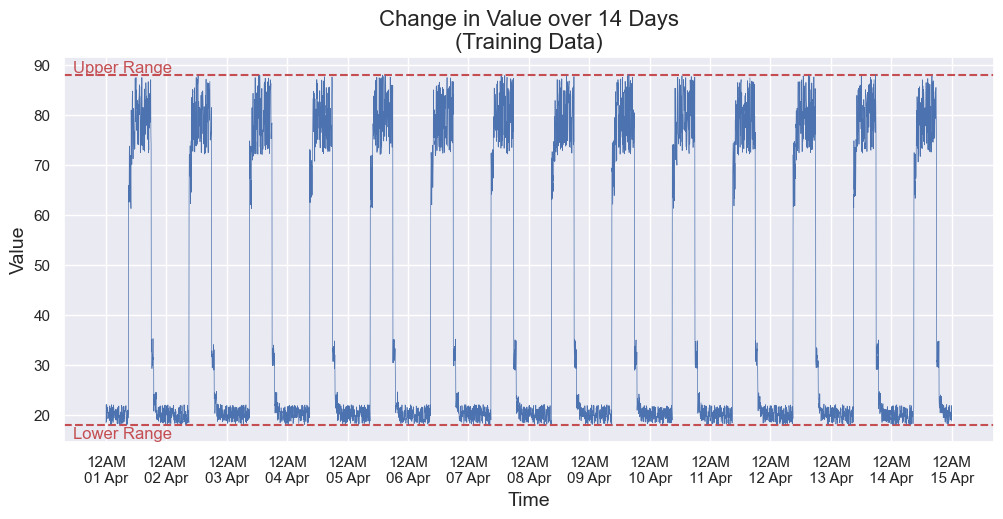

In [6]:
# Graph style
sns.set(style="darkgrid")

# Set figure size
fig, ax = plt.subplots(figsize=(12,5))

# Add title
plt.title("Change in Value over 14 Days\n(Training Data)", fontsize=16)

# Add x and y labels
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Define the date format
date_form = mdates.DateFormatter("12AM\n%d %b")
ax.xaxis.set_major_formatter(date_form)

# Set x-axis to 1 day intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Show red line at values range 
ax.axhline(y = 18, color = 'r', linestyle = '--')
ax.axhline(y = 88, color = 'r', linestyle = '--')

# Plot upper and lower range. 
plt.text(0.01, .96, 'Upper Range', color = 'r', transform=ax.transAxes)
plt.text(0.01, .01, 'Lower Range', color = 'r', transform=ax.transAxes)

# Plot Time vs Value
plt.plot(df_train.index, df_train['value'], linewidth=0.5);

#### We can see value rise and fall over the 14 days in a similiar pattern. Lets look at just one day.

In [7]:
df_train_day1 = df_train.iloc[0:288]
df_train_day1

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-01 23:35:00,18.712206
2014-04-01 23:40:00,20.892275
2014-04-01 23:45:00,18.164629


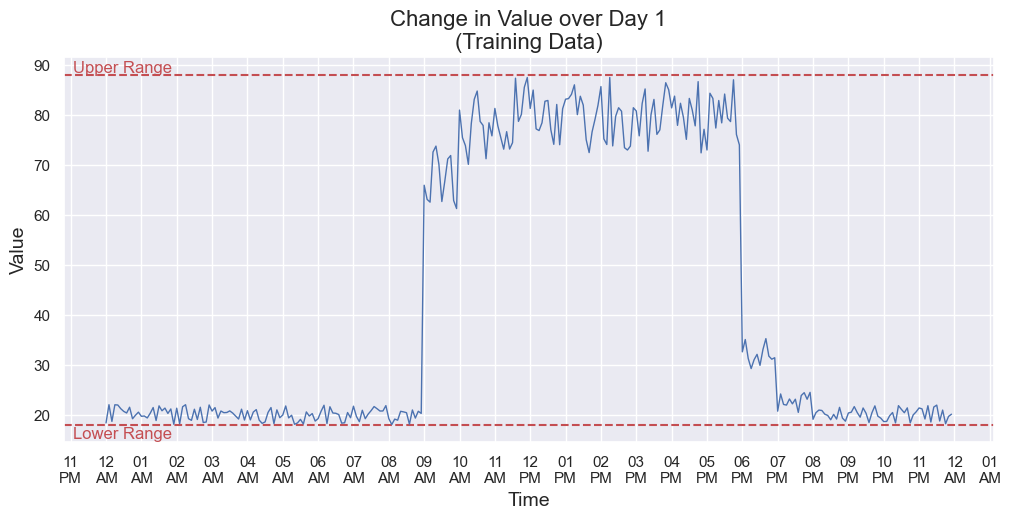

In [8]:
# Graph style
sns.set(style="darkgrid")

# Set figure size
fig, ax = plt.subplots(figsize=(12,5))

# Add title
plt.title("Change in Value over Day 1\n(Training Data)", fontsize=16)

# Add x and y labels
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Define the date format
date_form = mdates.DateFormatter("%I\n%p")
ax.xaxis.set_major_formatter(date_form)

# Set x-axis to 1 day intervals
ax.xaxis.set_major_locator(mdates.HourLocator())

# Show red line at values range 
ax.axhline(y = 18, color = 'r', linestyle = '--')
ax.axhline(y = 88, color = 'r', linestyle = '--')

# Plot upper and lower range. 
plt.text(0.01, .96, 'Upper Range', color = 'r', transform=ax.transAxes)
plt.text(0.01, .01, 'Lower Range', color = 'r', transform=ax.transAxes)

# Plot Time vs Value
plt.plot(df_train_day1.index, df_train_day1['value'], linewidth=1.0);


In [9]:
df_train_day2 = df_train.iloc[288:576]
df_train_day3 = df_train.iloc[576:864]
df_train_day4 = df_train.iloc[864:1152]
df_train_day5 = df_train.iloc[1152:1440]
df_train_day6 = df_train.iloc[1440:1728]
df_train_day7 = df_train.iloc[1728:2016]
df_train_day8 = df_train.iloc[2016:2304]
df_train_day9 = df_train.iloc[2304:2592]
df_train_day10 = df_train.iloc[2592:2880]
df_train_day11 = df_train.iloc[2880:3168]
df_train_day12 = df_train.iloc[3168:3456]
df_train_day13 = df_train.iloc[3456:3744]
df_train_day14 = df_train.iloc[3744:4032]

We can see that at each day has the same pattern. 
- From 12AM - 9AM value fluctuates between 18-22. 
- At 9AM there is a sharp rise in activity to about 65. 
- From 9AM - 10AM value fluctuates between 30-34. 
- By 10AM, value is up between 62-72. 
- The value fluctuates between 70-90 until 6PM. 
- At 6PM there is a sharp drop in value. 
- From 6PM - 7PM value fluctuates between 30-34. 
- At 7PM there is a sharp drop in value. 
- From 7PM - 8PM value fluctuates between 20-24. 
- From 8PM on value fluctuates between 18-24. 

<a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/#:~:text=Using%20the%20DateFormatter%20module%20from,number%20with%20lower%20case%20m" target="_blank">Earth Lab: How to Reformat Date Labels in Matplotlib</a> <br>
<a href="https://www.youtube.com/watch?v=_LWjaAiKaf8&t=889s&ab_channel=CoreySchafer" target="_blank">Corey Schafer (YouTube): Matplotlib Tutorial (Part 8): Plotting Time Series Data</a> <br>
<a href="https://stackoverflow.com/a/63281376" target="_blank">Stackoverflow: Fix plot</a>
<a href="https://docs.python.org/3/library/time.html" target="_blank">Python: Time access and conversions</a>

### `df_test` 

In [10]:
# art_daily_jumpsup.csv data file url.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

# Import and save data as a df - df_daily_jumpsup. 
df_test  = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

# Print 
df_test

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739
...,...
2014-04-14 23:35:00,18.074649
2014-04-14 23:40:00,21.002014
2014-04-14 23:45:00,20.566713


`df_test` also contains 4,032 rows of data with 2 columns `timestamp` (the index) and `value`. 

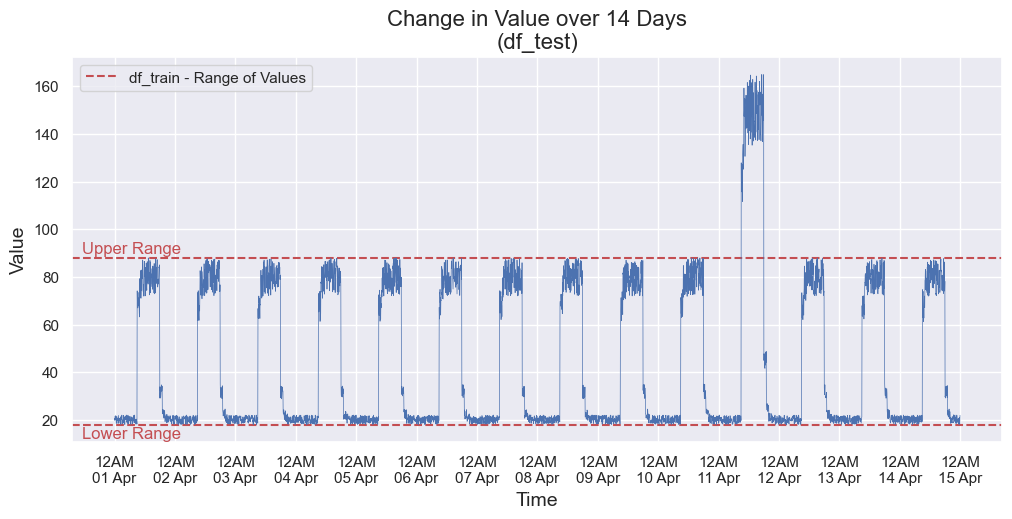

In [11]:
# Set figure size
fig, ax = plt.subplots(figsize=(12,5))

# Add title
plt.title("Change in Value over 14 Days\n(df_test)", fontsize=16)

# Add x and y labels
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Define the date format
date_form = mdates.DateFormatter("12AM\n%d %b")
ax.xaxis.set_major_formatter(date_form)

# Set x-axis to 1 day intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Show red line at values range 
ax.axhline(y = 18, color = 'r', linestyle = '--', label = 'df_train - Range of Values')
ax.axhline(y = 88, color = 'r', linestyle = '--')

# Legend
plt.legend(loc='upper left')

# Plot upper and lower range. 
plt.text(0.01, .49, 'Upper Range', color = 'r', transform=ax.transAxes)
plt.text(0.01, .01, 'Lower Range', color = 'r', transform=ax.transAxes)

# Plot Time vs Value
plt.plot(df_test.index, df_test['value'], linewidth=0.5);

In [12]:
df_train_day1 = df_train.iloc[0:288]
df_train_day2 = df_train.iloc[288:576]
df_train_day3 = df_train.iloc[576:864]
df_train_day4 = df_train.iloc[864:1152]
df_train_day5 = df_train.iloc[1152:1440]
df_train_day6 = df_train.iloc[1440:1728]
df_train_day7 = df_train.iloc[1728:2016]
df_train_day8 = df_train.iloc[2016:2304]
df_train_day9 = df_train.iloc[2304:2592]
df_train_day10 = df_train.iloc[2592:2880]
df_train_day11 = df_train.iloc[2880:3168]
df_train_day12 = df_train.iloc[3168:3456]
df_train_day13 = df_train.iloc[3456:3744]
df_train_day14 = df_train.iloc[3744:4032]

In [13]:
df_test_day1 = df_test.iloc[0:288]
df_test_day11 = df_test.iloc[2880:3168]

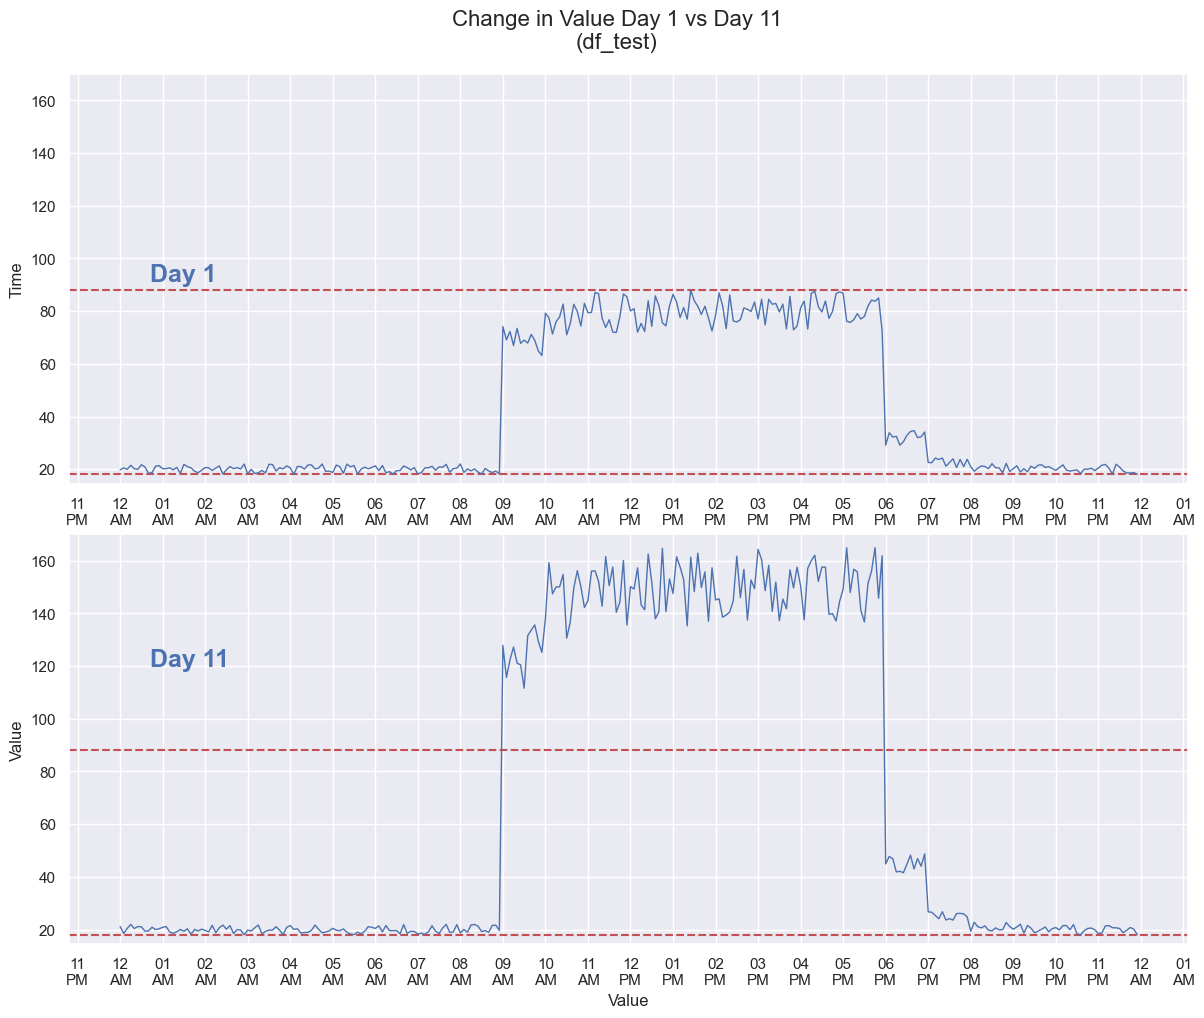

In [14]:
# Graph style
sns.set(style="darkgrid")

# Define the date format
date_form = mdates.DateFormatter("%I\n%p")

# Set figure size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

# Add title
fig.suptitle("Change in Value Day 1 vs Day 11\n(df_test)", fontsize=16)
plt.tight_layout()

plt.text(0.0001, 1.77, 'Day 1', color = 'b', fontsize = 18, weight='bold', transform=ax.transAxes)

ax1.xaxis.set_major_formatter(date_form)

# Set x-axis to 1 hour intervals
ax1.xaxis.set_major_locator(mdates.HourLocator())

# Show red line at values range 
ax1.axhline(y = 18, color = 'r', linestyle = '--')
ax1.axhline(y = 88, color = 'r', linestyle = '--')

ax1.set_ylim(top=170)

# Set y-label. 
ax1.set_ylabel('Time')

# Plot Time vs Value
ax1.plot(df_test_day1.index, df_test_day1['value'], linewidth=1.0)

plt.text(0.0001, 0.77, 'Day 11', color = 'b', fontsize = 18, weight='bold', transform=ax.transAxes)

ax2.xaxis.set_major_formatter(date_form)

# Set x-axis to 1 hour intervals
ax2.xaxis.set_major_locator(mdates.HourLocator())

# Show red line at values range 
ax2.axhline(y = 18, color = 'r', linestyle = '--')
ax2.axhline(y = 88, color = 'r', linestyle = '--')

# Set y-label. 
ax2.set_xlabel('Value')

ax2.set_ylim(top=170)

# Set y-label. 
ax2.set_ylabel('Value')

# Plot Time vs Value
ax2.plot(df_test_day11.index, df_test_day11['value'], linewidth=1.0);

<h3 style="color: #001a79;">Preprocessing</h3>

<hr style="border-top: 1px solid #001a79;" />

### `df_train`

In [15]:
# Calculate the mean of values
train_mean = df_train['value'].mean()

# Calculate the standard deviation of values
train_std = df_train['value'].std()

print(f'Mean: {train_mean:.2f}')
print(f'Standard Deviation: {train_std:.2f}')

Mean: 42.44
Standard Deviation: 28.08


In [16]:
# Normalise the data 
df_train_vals = (df_train - train_mean) / train_std
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


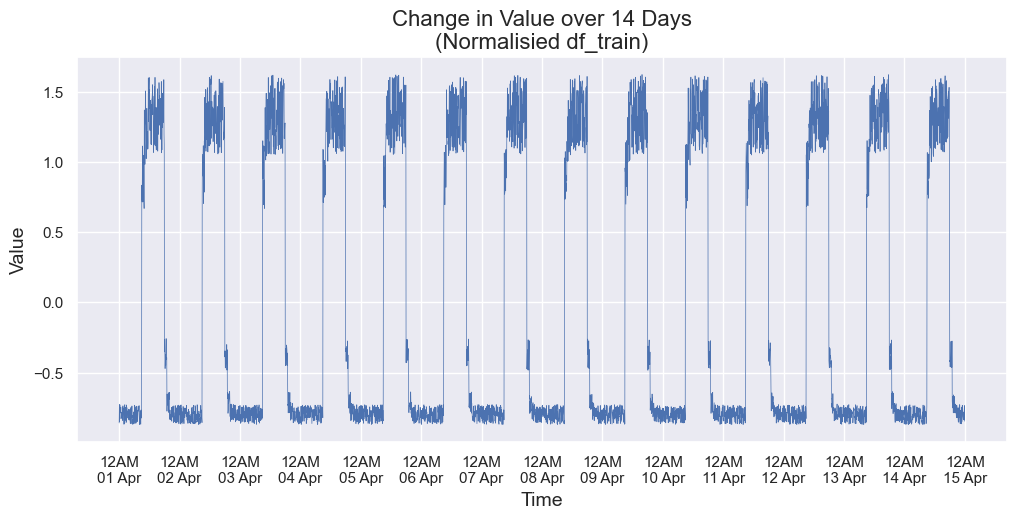

In [17]:
# Set figure size
fig, ax = plt.subplots(figsize=(12,5))

# Add title
plt.title("Change in Value over 14 Days\n(Normalisied df_train)", fontsize=16)

# Add x and y labels
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Define the date format
date_form = mdates.DateFormatter("12AM\n%d %b")
ax.xaxis.set_major_formatter(date_form)

# Set x-axis to 1 day intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Plot Time vs Value
plt.plot(df_train_vals.index, df_train_vals['value'], linewidth=0.5);

As mentioned above, values were recorded for 14 days, every 5 minutes. Therefore: 
- Every hour 12 values are recorded. 
- Every day 288 values are recorded. 
- So in 14 days 4,032 values are recorded in total.

In [18]:
# The number of values recorded per day
day_size = 288

In [19]:
df_train_vals

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173
...,...
2014-04-14 23:35:00,-0.791647
2014-04-14 23:40:00,-0.780255
2014-04-14 23:45:00,-0.833640


In [20]:
# Split 1D array into a 2D array of size N
def splitBySize(vals, N=day_size):
    # Empty list
    L = []
    # Loop through index 0 to the (length of vals - N + 1)
    for i in range(len(vals) - N + 1):
        # Separate vals into arrays of length N
        L.append(vals[i:i+N])
    # Stack these arrays to create a 2D array
    return np.stack(L)

#### How `splitBySize` works? 

Take the `example_df` below where collumn `Nums` is 6 rows between 1 - 6.  

In [21]:
myList = [x for x in range(1,7)]
example_df = pd.DataFrame(myList, columns=["Nums"])
example_df

,Nums
0,1
1,2
2,3
3,4
4,5
5,6


Set `n` be 3.  

In [22]:
n = 3

In [23]:
df_split = splitBySize(vals = example_df, N = n)
df_split

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]], dtype=int64)

In [24]:
df_split.shape

(4, 3, 1)

`splitBySize(vals = example_df, N = n)`

[1, 2, 3, 4, 5, 6] is split 4 lists of size 3: <br><br>
[1, 2, 3], <br>
[2, 3, 4], <br>
[3, 4, 5], <br>
[4, 5, 6] <br> 

Which are further split into lists of size 1: <br>

[1, 2, 3] = [1], [2], [3] <br>
[2, 3, 4] = [2], [3], [4] <br>
[3, 4, 5] = [3], [4], [5] <br>
[4, 5, 6] = [4], [5], [6] <br> 

This results in a 3D list of 4 lists containing 3 lists of size 1. 

In [25]:
x_train = splitBySize(df_train_vals)

In [26]:
print(x_train)
print(x_train.shape)

[[[-0.85882857]
  [-0.72899302]
  [-0.84814772]
  ...
  [-0.86453747]
  [-0.81250829]
  [-0.79671155]]

 [[-0.72899302]
  [-0.84814772]
  [-0.72958579]
  ...
  [-0.81250829]
  [-0.79671155]
  [-0.78767946]]

 [[-0.84814772]
  [-0.72958579]
  [-0.731173  ]
  ...
  [-0.79671155]
  [-0.78767946]
  [-0.73706287]]

 ...

 [[-0.8226548 ]
  [-0.86660975]
  [-0.82181363]
  ...
  [-0.79164661]
  [-0.78025492]
  [-0.83364049]]

 [[-0.86660975]
  [-0.82181363]
  [-0.75595835]
  ...
  [-0.78025492]
  [-0.83364049]
  [-0.73510213]]

 [[-0.82181363]
  [-0.75595835]
  [-0.74256753]
  ...
  [-0.83364049]
  [-0.73510213]
  [-0.8460886 ]]]
(3745, 288, 1)


1 array of 3745 arrays of 288 arrays of length 1. 

This results in a 3D list of 3,745 lists containing 288 lists of size 1. 

<h3 style="color: #001a79;">Neural Network</h3>

<hr style="border-top: 1px solid #001a79;" />

In [27]:
import os
# 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**Line by line explanation of the code below:**

`layers` - the layers of the neural network

`keras.layers.Input(shape=(288, 1))` - This sets the input layer of the neural network to 288 1D vertors. Above we used   splitBySize() to split df_train_vals into 1 array of 3745 arrays of 288 arrays of length 1. These will be inputted here. 


`keras.layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu")`
- This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.

- `filters=32` - sets the dimensionality of the output space (i.e. the number of output filters in the convolution) to 32. 

- `kernel_size=7` - specifies the length of the 1D convolution window to be 7.

- `padding="same"` - results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

- `strides=2` - specifies the stride length of the convolution. 
- `activation="relu"` - activation functions introduce non-linearity into our neural net calculations (Basically adds complexity to the value output). This allows us to fit more complex data and compute more complex things. ReLU is a type of activation function - avoids the vanishing gradient problem and is usually a safe bet. 

`keras.layers.Dropout(rate=0.2)` - rate is the probability nodes are randomly disconnected during training steps. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

`keras.layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu")`
This is used to apply the transposed 1D convolution operation, also known as deconvolution, on the data. Similiar to the Conv1D layer kernel_size=7, padding="same", strides=2, activation="relu" are the parameters while filters=16 in the Conv1DTranspose layer.



https://keras.io/api/layers/convolution_layers/convolution1d/
https://keras.io/api/layers/regularization_layers/dropout/
<a href="https://www.youtube.com/watch?v=aBIGJeHRZLQ&ab_channel=KeithGalli" target="_blank">Keith Galli's YouTube video</a>.

In [30]:
x_train.shape[2]

1

In [27]:
# Create layers of neural network
layers = [
    #
    keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
    
    #
    keras.layers.Conv1D(
        filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
    ),
    
    #
    keras.layers.Dropout(rate=0.2),
    
    #
    keras.layers.Conv1D(
        filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
    ),
    
    #
    keras.layers.Conv1DTranspose(
        filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
    ),
    
    #
    keras.layers.Dropout(rate=0.2),
    
    #
    keras.layers.Conv1DTranspose(
        filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
    ),
    
    #
    keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [28]:
model = keras.Sequential(layers)

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [30]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [32]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 5s 163ms/step - loss: 0.6085 - val_loss: 0.1019
Epoch 2/50
27/27 [==============================] - 2s 89ms/step - loss: 0.0854 - val_loss: 0.0409
Epoch 3/50
27/27 [==============================] - 4s 168ms/step - loss: 0.0597 - val_loss: 0.0352
Epoch 4/50
27/27 [==============================] - 5s 168ms/step - loss: 0.0495 - val_loss: 0.0302
Epoch 5/50
27/27 [==============================] - 3s 105ms/step - loss: 0.0426 - val_loss: 0.0265
Epoch 6/50
27/27 [==============================] - 3s 103ms/step - loss: 0.0379 - val_loss: 0.0242
Epoch 7/50
27/27 [==============================] - 3s 101ms/step - loss: 0.0338 - val_loss: 0.0219
Epoch 8/50
27/27 [==============================] - 3s 104ms/step - loss: 0.0310 - val_loss: 0.0223
Epoch 9/50
27/27 [==============================] - 3s 95ms/step - loss: 0.0285 - val_loss: 0.0203
Epoch 10/50
27/27 [==============================] - 3s 98ms/step - loss: 0.0264 - val_loss: 0.0207
Ep

<h3 style="color: #001a79;">Evaluation</h3>

<hr style="border-top: 1px solid #001a79;" />

In [33]:
history.history["loss"]

[0.6085138320922852,
 0.08536803722381592,
 0.05973117798566818,
 0.04951687902212143,
 0.04261493310332298,
 0.0378582626581192,
 0.03382854908704758,
 0.030953580513596535,
 0.028464291244745255,
 0.026390505954623222,
 0.024813001975417137,
 0.023381933569908142,
 0.02221679873764515,
 0.021093741059303284,
 0.02005700208246708,
 0.01924614980816841]

In [34]:
history.history["val_loss"]

[0.10187537968158722,
 0.040932547301054,
 0.03522924706339836,
 0.030182261019945145,
 0.026464127004146576,
 0.024204660207033157,
 0.02186533622443676,
 0.022322392091155052,
 0.020289864391088486,
 0.020674265921115875,
 0.019490528851747513,
 0.019759368151426315,
 0.019977787509560585,
 0.02021055296063423,
 0.020051807165145874,
 0.020071323961019516]

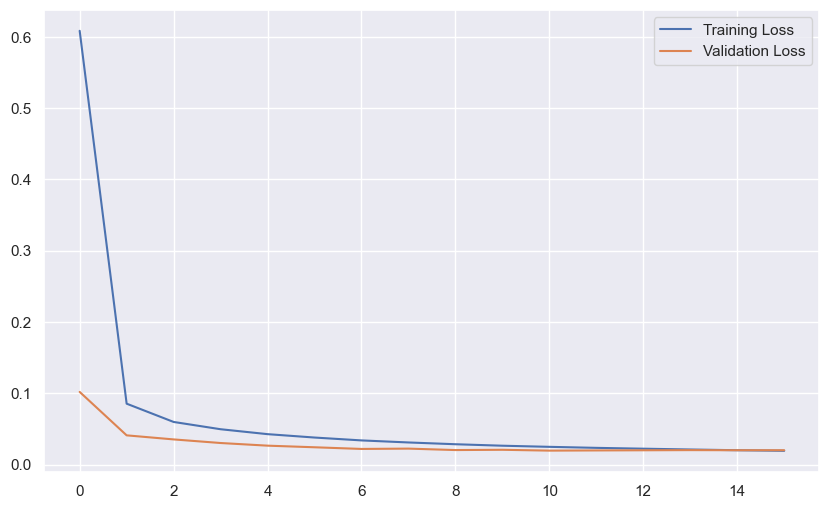

In [35]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [36]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 0s 2ms/step


In [37]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

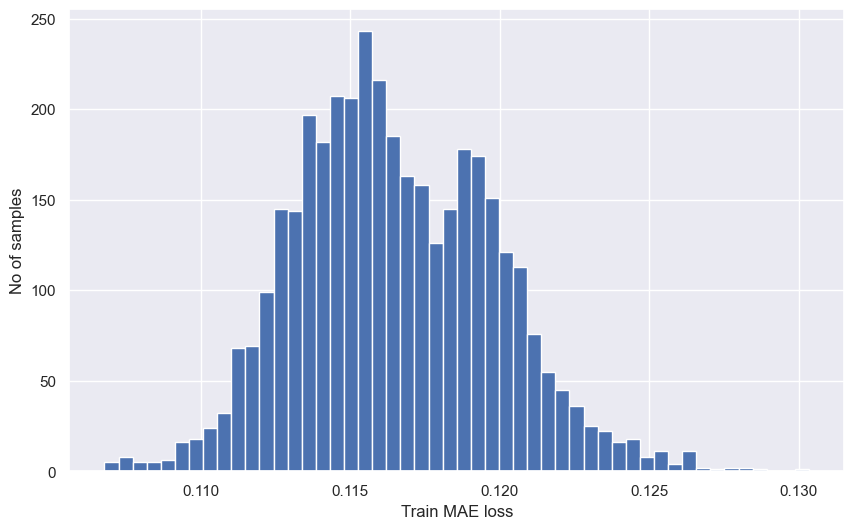

In [38]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [39]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.13033925628264037

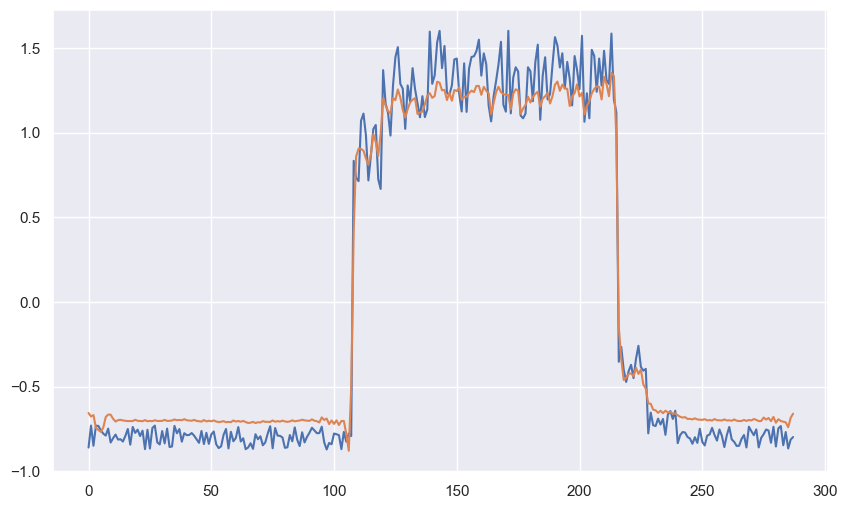

In [40]:

# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [41]:

# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

NameError: name 'df_daily_jumpsup' is not defined

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [ ]:
# Create sequences from test values.
x_test = splitBySize(df_test_value.values)

x_test.shape

In [ ]:

# 
x_test_pred = model.predict(x_test)

In [ ]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

In [ ]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [ ]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(288 - 1, len(df_test_value) - 288 + 1):
    if np.all(anomalies[i - 288 + 1 : i]):
        inds.append(i)

In [ ]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

In [ ]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");